In [ ]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import cv2

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

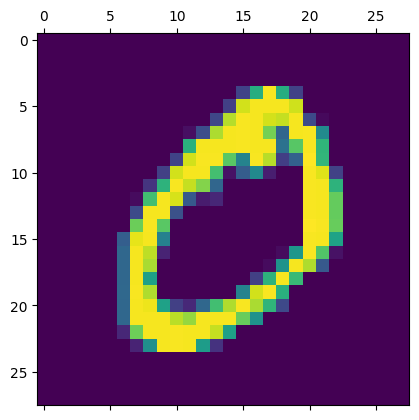

In [ ]:
plt.matshow(X_train[1])

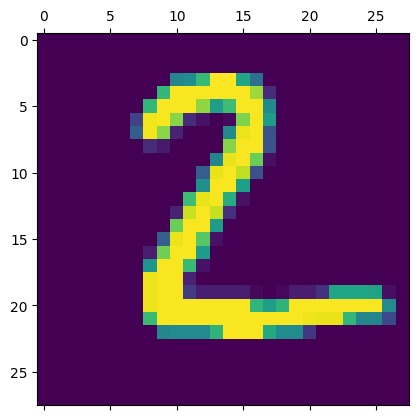

In [ ]:
plt.matshow(X_test[1])

In [ ]:
#Scaling the Images for the RGB pixels
X_train = X_train/225
X_test = X_test/225

#Adding a dimension to the given data so it can be easily proccessed by cnn
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)

#One hot-encoding for converting categorical data to numerical data
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
Y_test[:2]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
#Traning the CNN model

cnn = keras.Sequential([

                        keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
                        keras.layers.MaxPooling2D((2,2)),

                        keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
                        keras.layers.MaxPooling2D((2,2)),

                        keras.layers.Flatten(),
                        keras.layers.Dense(64, activation='relu'),
                        keras.layers.Dense(10, activation='softmax')

])

cnn.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.fit(X_train, Y_train, batch_size = 64, epochs = 5, validation_data = (X_test, Y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8723 - loss: 0.4194 - val_accuracy: 0.9821 - val_loss: 0.0575
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9812 - loss: 0.0612 - val_accuracy: 0.9847 - val_loss: 0.0443
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9873 - loss: 0.0395 - val_accuracy: 0.9878 - val_loss: 0.0375
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9905 - loss: 0.0306 - val_accuracy: 0.9880 - val_loss: 0.0373
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9923 - loss: 0.0244 - val_accuracy: 0.9908 - val_loss: 0.0310


In [ ]:
predicted = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
#Using opencv

image = cv2.imread('nine.png', cv2.IMREAD_GRAYSCALE)

image = cv2.resize(image, (28,28))
image = cv2.bitwise_not(image)
image = image/255

image = np.expand_dims(image, axis = 0)
image = np.expand_dims(image, axis=-1)

prediction = np.argmax(cnn.predict(image))

print("The image is:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
The image is: 1


In [ ]:
cnn.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9900 - loss: 0.0372


[0.03096252679824829, 0.9908000230789185]

Text(120.72222222222221, 0.5, 'truth')

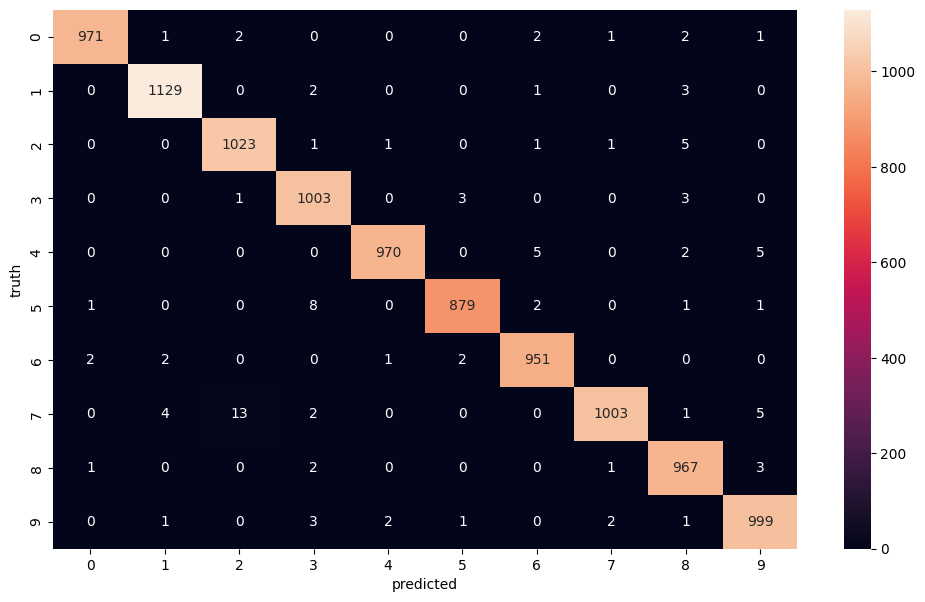

In [ ]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels = Y_test, predictions = predicted)

plt.figure(figsize=(12,7))
sn.heatmap(cm, annot=True, fmt ='d')
plt.xlabel('predicted')
plt.ylabel('truth')